In [10]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision import transforms
from torchvision.utils import save_image, make_grid

from PIL import Image


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
torch.Size([16, 3, 28, 28])


C:\Users\willd\AppData\Local\Temp\ipykernel_19372\1425661474.py:42: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  ims.resize((256, 256), resample=Image.NEAREST)


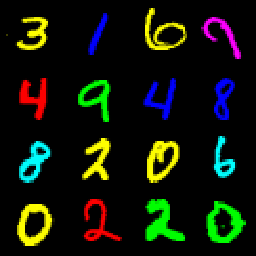

In [125]:
size = (1, 28, 28)

from itertools import product
color_combs = list(product([0, 1], repeat=3))[1:][:-1]

def perform(x):
    channels_present = color_combs[np.random.randint(0, len(color_combs))]
    return torch.cat([x * ch_pr for ch_pr in channels_present], dim=0)

tf = transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(perform), transforms.Normalize((0.5,), (1.0))]
    )
dataset = MNIST(
    "./data",
    train=True,
    download=True,
    transform=tf,
)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)

counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
for i, (x, t) in enumerate(dataloader):
    for t_ in t:
        counts[t_.item()] += 1
    # break
print(counts)
im = x

im = im + 0.5
print(im.shape)
channels_present = [1, 1, 1]
# filt = torch.cat([torch.ones_like(im) * ch_pr for ch_pr in channel_present], dim=1)
# print(filt.shape)
# im = torch.cat([im * ch_pr for ch_pr in channels_present], dim=1)
# im = im * filt

# im *= torch.randint(0, 2, (16, 3, 1, 1)).float()
im = (im* 255).type(torch.uint8)
ims = make_grid(im, nrow=4)
ims = ims.permute(1, 2, 0).numpy()
ims = Image.fromarray(ims)
ims.resize((256, 256), resample=Image.NEAREST)